In [7]:
pip install nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install TextBlob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
def clean_tweet(tweet):
    if not isinstance(tweet, str):
        return ""  # For NaN or non-string values
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    tweet = tweet.lower()
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)
    return tweet


In [22]:
df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)


In [23]:
print(df.columns)


Index(['ID', 'Entity', 'Sentiment', 'Tweet', 'Clean_Tweet'], dtype='object')


In [24]:
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Vader_Sentiment'] = df['Clean_Tweet'].apply(vader_sentiment)


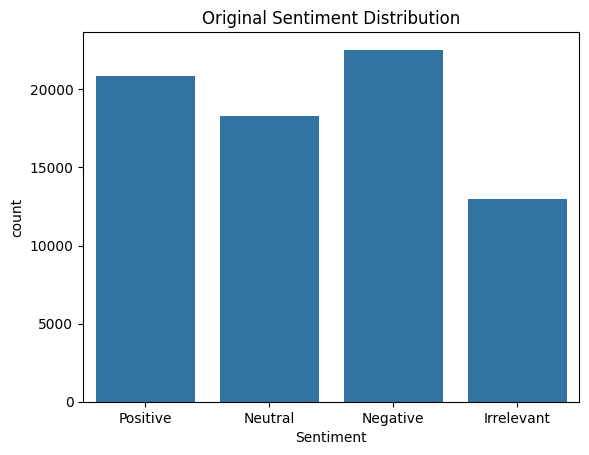

In [25]:
sns.countplot(x='Sentiment', data=df)
plt.title('Original Sentiment Distribution')
plt.show()


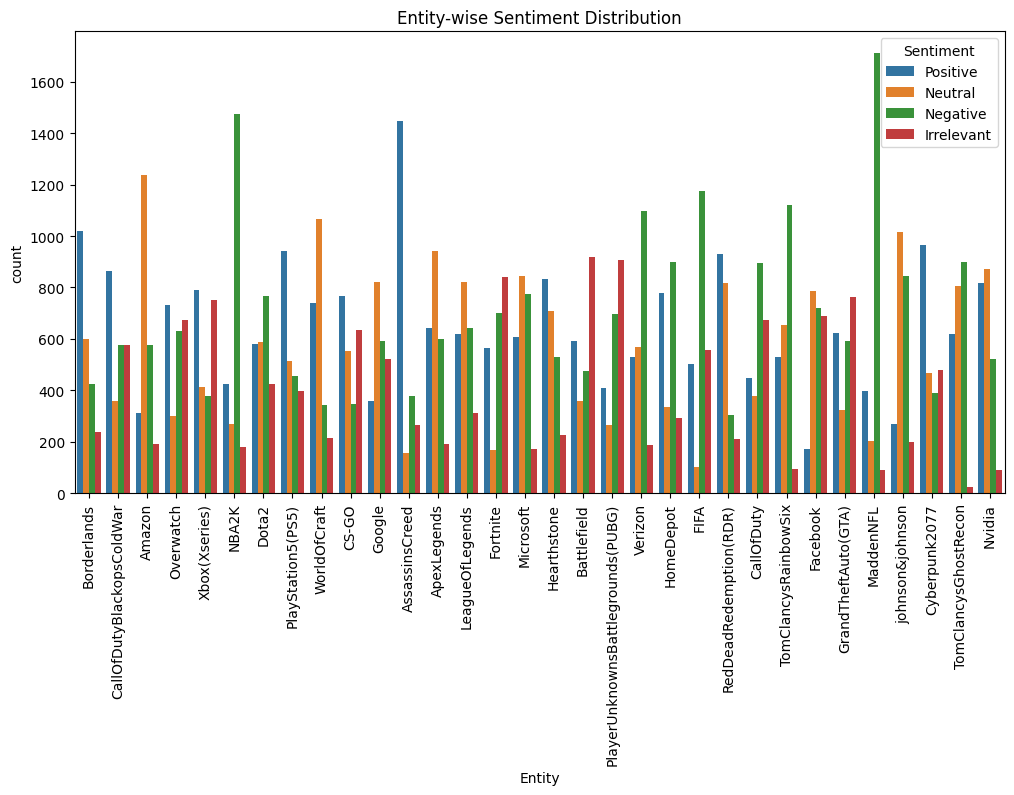

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Entity', hue='Sentiment')
plt.title("Entity-wise Sentiment Distribution")
plt.xticks(rotation=90)
plt.show()


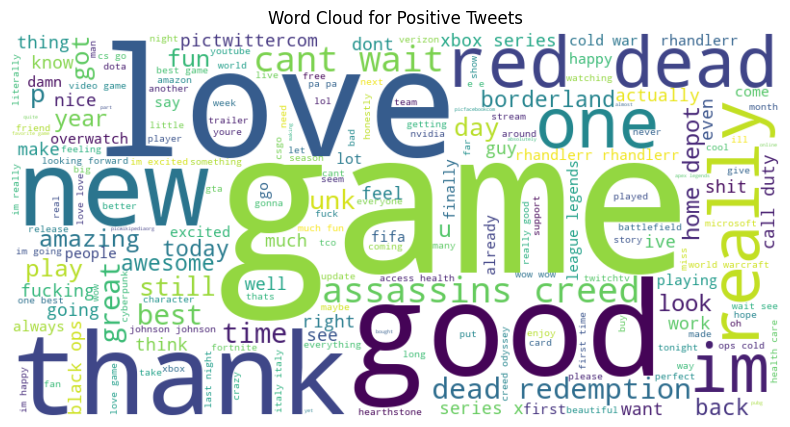

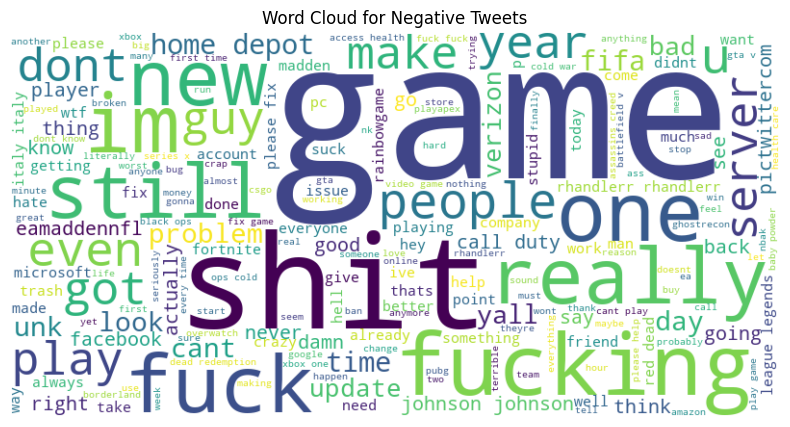

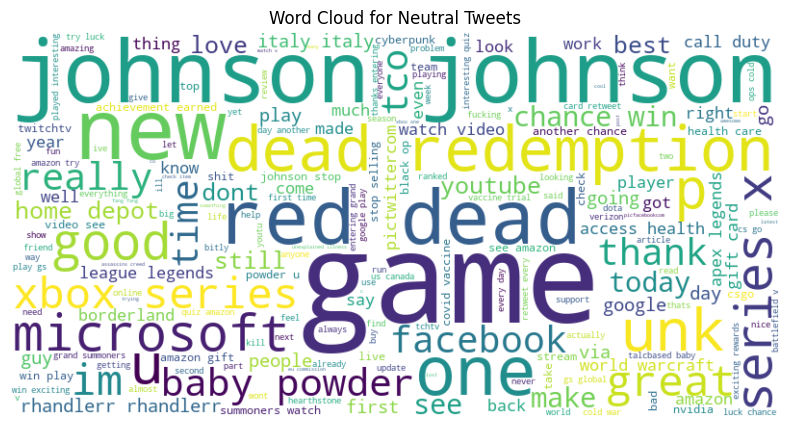

In [27]:
def generate_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')


In [28]:
df.to_csv("final_sentiment_analysis_data.csv", index=False)
